# Imports

In [231]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, svm
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
df = pd.read_csv('data/student-mat.csv', sep=';')


## What describes the main data frame?

In [232]:
df.describe()

print("The data frame has " + str(len(df.columns)) + " features including the following:")
df.head(n = 20)

The data frame has 33 features including the following:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


We see above that the data frame has 33 features with a lot of information with regards to a student that could be correlated to their G3. Important features may include their relative health, their other term scores and the amount of time they spend in, out of, or studying for school.

Let's take some of the features that stand out after cleaning the data a little.

In [233]:
print(df.columns)
df.info

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

# Cleaning on data that may not be necessary

In [234]:
include = ['studytime', 'absences', 'goout', 'Dalc','G1', 'G2', 'G3']
df.drop(columns=df.columns.difference(include), inplace=True)  
df['qualified_stu'] = np.where(df['G3'] >= 15, 1, 0)
trainingDF = df.drop(['qualified_stu', 'G3'], axis = 1)
trainingDF.head(n=1)

,studytime,goout,Dalc,absences,G1,G2
0,2,4,1,6,5,6


# Including special features

Let's look at some of the data that may be found in the dataFrame

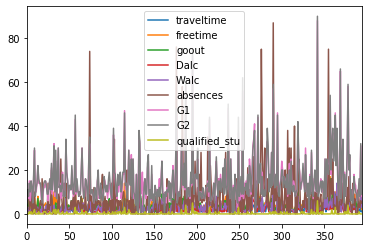

In [220]:
tdf = df.groupby(['studytime', 'failures', 'activities', 'health','G3']).cumsum()
tdf.plot()


,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qualified_stu
0,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,6,0
1,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,6,0
2,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,10,0
3,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15,1
4,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,10,0


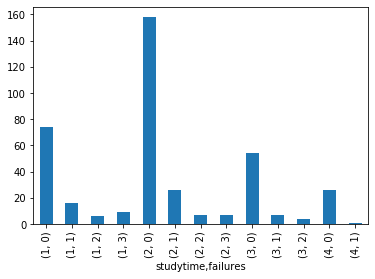

In [221]:
df.groupby(['studytime', 'failures']).count().qualified_stu.plot(kind = 'bar')
df.head()

,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qualified_stu
0,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,6,0
1,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,6,0
2,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,10,0
3,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15,1
4,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,10,0


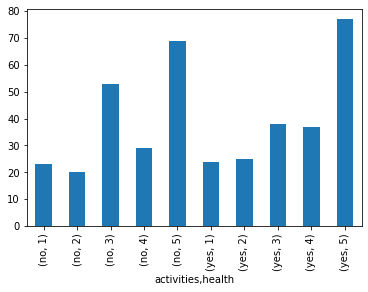

In [222]:
df.groupby(['activities', 'health']).count().qualified_stu.plot(kind = 'bar')
df.head()

We will remove the labelled data and parse the training data. X will include the features that we have isolated and y the labels.

Note that we set the indicators for X with dummies

In [235]:
X = trainingDF
y = df['qualified_stu']
X = pd.get_dummies(X)
X.head(n=1)
X.columns

Index(['studytime', 'goout', 'Dalc', 'absences', 'G1', 'G2'], dtype='object')

# Splitting the train and test sets

In [236]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.27)

## Using Random Forest

In [245]:
# rfc = RandomForestClassifier(criterion='gini', 
#                              n_estimators=200,
#                              max_depth=7,
#                              min_samples_split=5,
#                              min_samples_leaf=3,
#                              max_features='auto',
#                              oob_score=True,
#                              random_state=42,
#                              n_jobs=-1,
#                              verbose=1)
# rfc = svm.SVC()
rfc = tree.DecisionTreeClassifier(max_depth = 5)
rfc.fit(X_train, y_train)
pred = rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)
print('****Results****')
print("Accuracy: {:.4%}".format(pred))
y_pred

****Results****
Accuracy: 97.1963%


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [246]:
acc_train = rfc.score(X_train, y_train)
print("Training accuracy:", acc_train)
acc_test = rfc.score(X_test, y_test)
print("Test accuracy:", acc_test)


Training accuracy: 0.9930555555555556
Test accuracy: 0.9719626168224299


In [247]:
precision = precision_score(y_test.values, y_pred, average = 'binary')
recall = recall_score(y_test.values, y_pred, average = 'binary')
f1_score = 2 * (precision * recall) / (precision + recall)
scores = cross_val_score(rfc, X.values, y.values, cv=10, scoring='roc_auc')
scoresP = cross_val_score(rfc, X.values, y.values, cv=10, scoring='f1_macro')
print("Precision is ", precision)
print("Recall is ", recall)
print("F1_score is ", f1_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresP.mean(), scoresP.std()))

Precision is  0.9565217391304348
Recall is  0.9166666666666666
F1_score is  0.9361702127659574
0.94 accuracy with a standard deviation of 0.05
0.95 accuracy with a standard deviation of 0.04


# Confusion Matrix

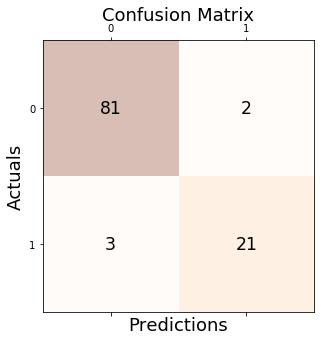

In [240]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# SVC

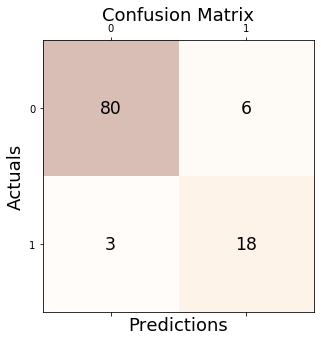

In [212]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [248]:
joblib.dump(rfc, 'model.pkl')

['model.pkl']

# Quick cross validation 

In [202]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(rfc, X, y, cv=cv)

array([0.96638655, 0.97478992, 0.94117647, 0.96638655, 0.96638655])

In [206]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(rfc, X, y, scoring = scoring)
# sorted(scores.keys())
scores

{'fit_time': array([0.01794982, 0.01750588, 0.01153088, 0.01334405, 0.01247454]),
 'score_time': array([0.01572013, 0.01155806, 0.01384664, 0.01730919, 0.01272535]),
 'test_precision_macro': array([0.93594527, 0.99242424, 0.96875   , 0.85119048, 0.98484848]),
 'test_recall_macro': array([0.88516484, 0.96428571, 0.9921875 , 0.86875   , 0.93333333])}

# K-Fold 

In [211]:
# random_state = 123456
# rkf = RepeatedKFold(n_repeats = 2, random_state=random_state)
# for train, test in rkf.split(X):
#   rfc.fit(train, y_train)
#   pred = rfc.score(test, y_test)
#   y_pred = rfc.predict(test)
#   print('****Results****')
#   print("Accuracy: {:.4%}".format(pred))